This notebook is a simple tutorial called "Walkthrough: Mapping GIS Data in Python" available on TowardsDataScience, by
[Nicole Janeway Bills](https://towardsdatascience.com/walkthrough-mapping-gis-data-in-python-92c77cd2b87a). Rather than using GoogleCollab, I've run everything via my [GitHub: @ciaranmci](https://github.com/ciaranmci/GIS-study).

Other changes I've made are:
1. I converted the '.coords' to a numpy array instead because the array interface will be deprecated in Shapely 2.0.
2. Provided two alternative ways of converting a CSV into a GeoDataFrame object.


### Prerequisites

#### Installations.
The geopandas library was installed in a separate environment via conda, using guidance from [Tanish Gupta's Medium post](https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b). It is assumed that you have Anaconda installed. If not, install Anaconda on your machine by following [these instructions](https://docs.anaconda.com/anaconda/install/index.html).

#### Imports.

In [65]:
import pandas
import numpy
import geopandas
from shapely.geometry import Point, Polygon, MultiPolygon
from shapely import wkt
import rtree

#### Load data.

In [66]:
puds = geopandas.read_file('data/Planned_Unit_Development_(PUDs)/Planned_Unit_Development_(PUDs).shp')#, crs = {'init' :'epsg:4326'})
puds.crs = 'epsg:4326'
# Load CSV directly as GeoDatFrame.
aff_gpds = geopandas.read_file('data/Affordable_Housing.csv')
aff_gpds.crs = 'epsg:4326'
# Load CSV as CSV and then convert to GeoDataFrame.
aff_csv = pandas.read_csv('data/Affordable_Housing.csv')
aff = geopandas.GeoDataFrame(aff_csv, geometry = geopandas.points_from_xy(aff_csv.X, aff_csv.Y))
aff.crs = 'epsg:4326'
crosswalk = pandas.read_csv('data/zoning_crosswalk.csv')

### Data processing

Use geospatial join to identify which Planned Unit Developments include affordable housing projects.

In [67]:
puds_aff = geopandas.sjoin(puds, aff, op='intersects', how='left')

C:\Users\medcmci\.conda\envs\geopandas_env\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Merge dataframe with zoning categories from the crosswalk dataframe.

In [68]:
puds_info = puds_aff.merge(crosswalk[['Zone_Cat']], how='left', left_on='PUD_ZONING', right_on=crosswalk['Zone'])

### Plotting

 Create a map of PUDs by Zoning Category

<AxesSubplot:>

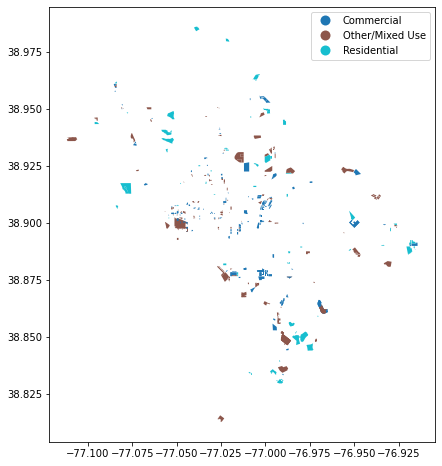

In [69]:
puds_info.plot(column='Zone_Cat', legend=True, figsize=(16,8))

 Create a map of just the Planned Unit Developments that provide Affordable Housing.

<AxesSubplot:>

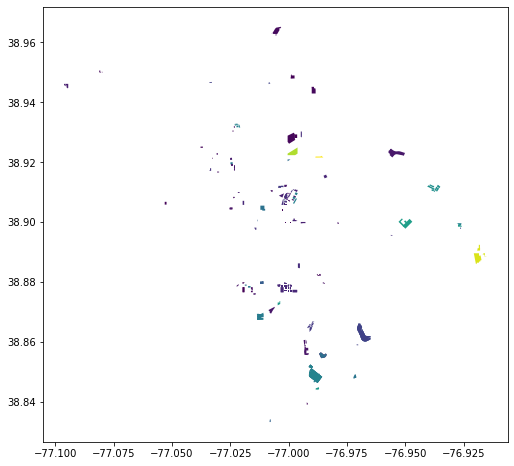

In [70]:
puds_info[puds_info['TOTAL_AFFORDABLE_UNITS']>0].plot(column='TOTAL_AFFORDABLE_UNITS', figsize=(16,8))

Export geodataframe as shapefile within Colab environment

### Saving outputs

In [71]:
puds_info.to_file('output/puds_info.shp')

C:\Users\medcmci\.conda\envs\geopandas_env\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\medcmci\AppData\Local\Temp\ipykernel_17676\227509761.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  puds_info.to_file('output/puds_info.shp')
